## Integrating a simple harmonic oscillator and trying to fit for the spring constant

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def leapfrog(x0, v0, phi_grad, dt, nsteps, *args, **kwargs):
    #function that takes initial conditions that takes us to the next position 
    v0_5 = v0 + phi_grad(x0, *args, **kwargs)*dt/2.
    x = np.zeros(nsteps+1)
    v = np.zeros(nsteps+1)
    x[0] = x0
    v[0] = v0
    for i in range(nsteps):
        x[i+1] = x[i] + dt*v0_5
        a      = -phi_grad(x[i+1], *args, **kwargs)
        v[i+1] = v0_5 + a*dt/2
        v0_5   = v0_5 + a*dt
    return x, v

In [3]:
def phi_grad(x, k=1):
    return k*x

In [46]:
def genData(x, v,npoints, std_noise):
    randind = np.random.choice(len(x), npoints, replace=False)
    noise_x = np.random.normal(0, std_noise, len(randind))
    noise_v = np.random.normal(0, std_noise, len(randind))
    return noise_x + x[randind], noise_v + v[randind], randind

In [51]:
x0_true = 0
v0_true = 100
dt = 0.1
nsteps = 100
npoints = 10
std_noise = 1.0
k = 10

In [54]:
x, v = leapfrog(x0_true, v0_true, phi_grad, dt, nsteps, k=k)
x_obs, v_obs, ind = genData(x, v, npoints, std_noise)

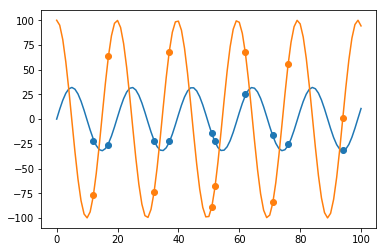

In [55]:
plt.plot(x)
plt.plot(v)
plt.scatter(ind, x_obs)
plt.scatter(ind, v_obs)

In [ ]:
def ln_likelihood(theta, data):
    k, x0, v0 = theta
    